<a href="https://colab.research.google.com/github/DavidLubkeman/Power_System_Analysis_with_Python/blob/main/Power_System_Transients_Analysis/RL_Circuit_Fault_Analysis/RL_Circuit_Fault_Analysis_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RL Circuit Transient Analysis for Fault Current

#### Dr. David Lubkeman
### Power System Analysis with Python
##### (Topic Area: Power System Transients Analysis)
   

## Fault Current Analysis Scenario

Consider the calculation of fault current on a radial system as illustrated here. <br>
       
In this scenario we have a circuit breaker set up with a relay to detect and clear a fault.
    
The results of the fault current analysis are used for determining
- Circuit breaker interrupting current
- Circuit breaker peak instantaneous current
- Relay settings that coordinate with other protective devices that sense the fault current

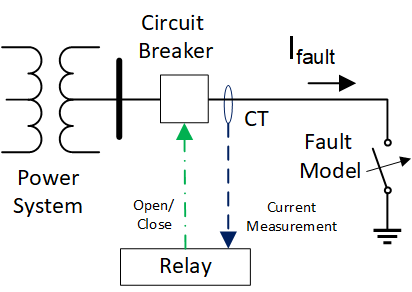

Figure 1. Fault Current Analysis Scenario


## Jupyter Notebook Topics

1. Closed-form solution to the ordinary differential equation corresponding to a fault on an RL circuit.
2. Development of Python code for solving and plotting the fault current results.
3. Computation of peak current as a function of the X/R ratio.
4. Example One - utilize Python code for a basic RL circuit solution.
5. Example Two - adds prefault and postfault current to solution of Example One.
6. PSCAD Benchmarking of worked examples.


## Fault Analysis Assumptions
       
- Only considering a single-phase to ground fault
- Fault modeled as a zero impedance to ground (bolted fault)
- Only a single equivalent upstream source is providing the fault current
- Fault does not have to be right at the circuit breaker, although this will give us worst case current
- Circuit Breaker modeled as zero impedance when closed

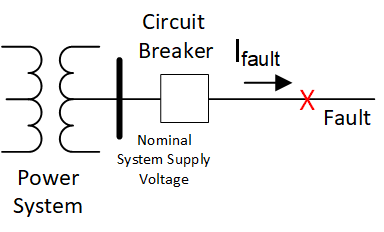

Figure 2. Fault Analysis Assumptions

## RL Fault Circuit Model
       
- Calculation based on a Thevenin equivalent circuit as seen from point of fault
- Equivalent series R and L are self-impedances for the faulted phase
- Will initially consider a no load case, so that the prefault load current is 0
- Format equations so that fault occurs at time, t=0
- Since inductor current cannot change instantaneously when fault is applied, then when switch is intially closed $i(0) = 0$
- Equivalent voltage corresponds to
$$ {v_s}\left( t \right) = \sqrt 2 {V_M}\sin \left( {\omega t + \theta } \right) $$
where ${V_M}$ is the per-phase nominal voltage RMS magnitude and $\theta$ is the point on wave of the voltage at which fault occurs

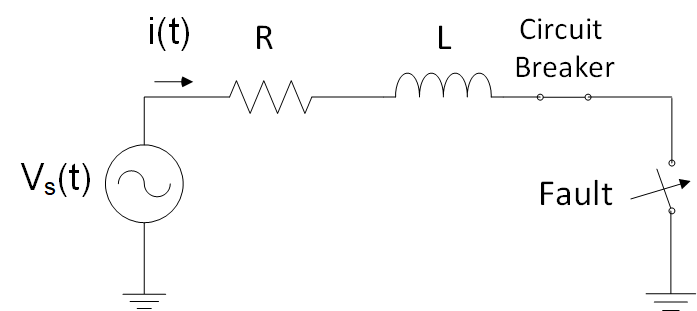

Figure 3. RL Fault Circuit Model


## Ordinary Differential Equation (ODE) for Fault Current

When the switch modeling the fault closes at $t=0$, then we have a basic loop circuit where current is related to the source voltage by
$$ L\frac{{di}}{{dt}} + Ri = \sqrt 2 {V_M}\sin \left( {\omega t + \theta } \right) \tag{1} $$
with a boundary condition for current
$$ i(0) = 0 $$

Since we want to model the fault as an ideal switch closing at time $t = 0$, then we need a means to represent the voltage at the time of the fault.

In this formulation, the point on wave angle $\theta$ is adjusted to give us the desired voltage at $t=0$.

So for example, a fault occurring during a point on wave equal to the peak voltage has $\theta =90$ degrees.


## ODE Solution Components

We will employ a closed-form time-domain solution approach referred to as the Method of Undetermined Coefficients.

For this single-source linear circuit, the solution has a steady-state component and a transient component as follows:
$$i\left( t \right) = {i_{ss}}\left( t \right) + {i_{tr}}\left( t \right) \tag{2}$$
where
- Steady-state component (ss), also referred to as the particular solution, corresponds to what occurs in steady-state due to the sinusoidal forcing function.

- Transient component (tr), also referred to as the complementary solution, has a form that can be obtained by looking at the natural response of the circuit without a forcing function.  

The natural response is determined by initial capacitor voltages and/or inductor currents at the start of the transient that cannot change instantaneously when a circuit switching transition occurs.

## Steady-State Solution Component

To obtain the steady-state component of the solution, perform a phasor analysis using the circuit shown below and convert the result back to the time domain. The circuit impedance is given by:
  $$Z = R + j\omega L = \sqrt {{R^2} + {{\left( {\omega L} \right)}^2}} \angle \phi \tag{3} $$
  $$  \phi  = {\tan ^{ - 1}}\left( {\frac{{\omega L}}{R}} \right) \tag{4} $$

Solving for the steady-state current phasor (RMS magnitude) results in
  $${\tilde I_{ss}} = \frac{{{V_M}\angle \theta }}{Z} = \frac{{{V_M}}}{{\sqrt {{R^2} + {{\left( {\omega L} \right)}^2}} }}\angle \theta  - \phi \tag{5}$$

In the time domain this converts back to
$$ {i_{ss}}(t) = \frac{{\sqrt 2 {V_M}}}{{\sqrt {{R^2} + {{\left( {\omega L} \right)}^2}} }}\sin \left( {\omega t + \theta  - \phi } \right) \tag{6}$$

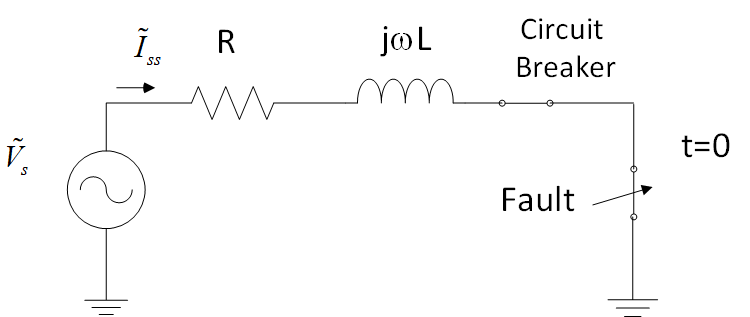

Figure 4. RL Fault Steady-State Response

## Steady-State Solution Component

Plot below shows an example steady-state fault current.

Note how this waveform is symmetrical about the y-axis, which is why this is referred to as the "symmetrical current".

The RMS magnitude of this current is used to size the interrupting capability of the circuit breaker.

The RMS magnitude is also used for protection coordination with upstream and downstream protection devices.

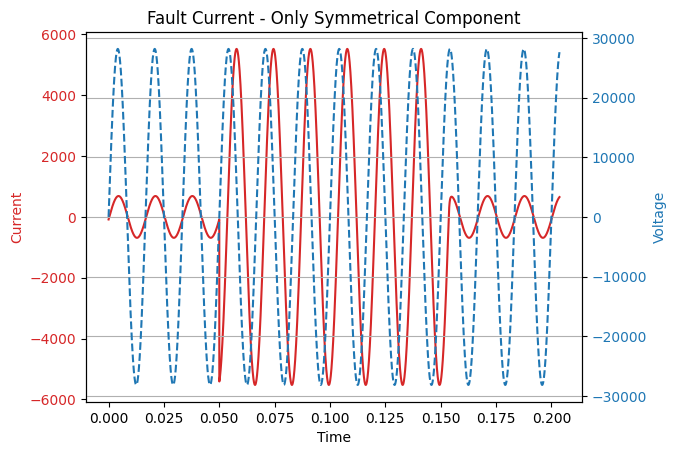

Figure 5. RL Fault Steady-State Response

## But Solution is Still Incomplete!

We can see that the above steady-state solution is incomplete since the boundary condition of $i(0) = 0$ is not satisfied.

If we just computed the steady-state component, we see an instantaneous jump in the current when the fault is applied.

This is not possible since current cannot change instantaneously in the series inductance.

So we need to model the transition from a steady-state prefault circuit to a steady-state faulted circuit by including the transient component.

## Transient Component Equation

The transient component of the solution is found by solving the circuit shown below, which has no forcing function.  The equation to be solved is

  $$ L\frac{{di}}{{dt}} + Ri = 0 \tag{7}$$

Solution to this equation is of the form $i(t)=A{e^{st}}$ where $A$ is a constant depending on the state of the circuit at $t=0$.

If we substitute exponential expression into Equation (7), then dividing both sides of equality by $A{e^{st}}$, we obtain what is referred to as the characteristic equation for the natural response.

In this scenario, the characteristic equation to be solved in order to determine $s$ is

  $$ \left( {s + \frac{R}{L}} \right) = 0\quad where\quad s =  - \frac{R}{L} \tag{8}$$

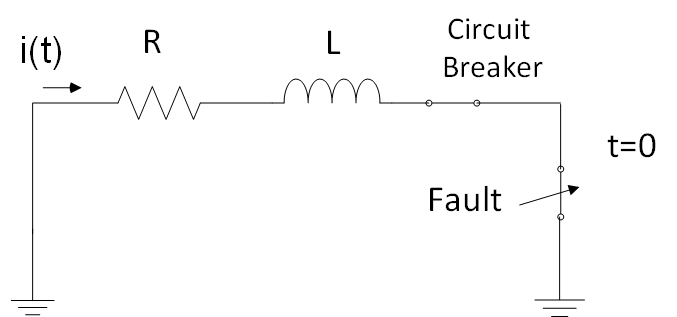

Figure 6. RL Transient Response

## Transient Component Solution Impact

Transient component of the solution given by
  $$  {i_{tr}}\left( t \right) = A{e^{ - \left( {R/L} \right)t}} \tag{9}$$

The total solution for the fault current is the sum of the steady-state and transient components:

  $$i(t) = {i_{ss}} + {i_{tr}} = \frac{{\sqrt 2 {V_M}}}{{\sqrt {{R^2} + {{\left( {\omega L} \right)}^2}} }}\sin \left( {\omega t + \theta  - \varphi } \right) + A{e^{ - \left( {R/L} \right)t}} \tag{10}$$

The constant $A$ must still be determined by applying initial circuit condition of $i(t=0)=0$.

Note that the exponential term will add an exponentially decaying DC component to the steady-state current that satisfies the initial current constraint.

## Application of Boundary Conditions

Since the current flowing through the inductor cannot change instantaneously, then current before and after switching at $t=0$ is defined by:

  $$ i\left( {{0^ - }} \right) = i\left( {{0^ + }} \right) = 0 \tag{11}$$

When we apply this initial condition to solve for $A$, for this initial condition at $t=0$, we find that
  $$ A = - \frac{{\sqrt 2 {V_M}}}{{\sqrt {{R^2} + {{\left( {\omega L} \right)}^2}} }}\sin \left( {\theta - \varphi } \right) \tag{12}$$

giving us a final solution
  $$ \begin{array}{l}
i\left( t \right) = \frac{{\sqrt 2 {V_M}}}{{\sqrt {{R^2} + {{\left( {\omega L} \right)}^2}} }}\left( {\sin \left( {\omega t + \theta  - {{\tan }^{ - 1}}\left( {\frac{{\omega L}}{R}} \right)} \right)} \right.\\
\left. {\quad \quad \quad \quad \quad \quad \quad  - \sin \left( {\theta  - {{\tan }^{ - 1}}\left( {\frac{{\omega L}}{R}} \right)} \right){e^{ - \frac{R}{L}t}}} \right)
\end{array} \tag{13}$$

Observe that the current is not only dependent on ${V_M}$, R and L, but point on wave angle $\theta$ for voltage as well.

## Python Code for Fault Current (using Math library)

Applying the Equations (1)-(13), we can calculate and plot the current using the example Python code provided below.

You can adjust the circuit parameters R, X, Vm, f as needed.  Note that reactance is normally given as input, so need to convert this to inductance.

In this example code, the (1) fault current is plotted with the solid curve and the (2) steady-state and (3) transient components are plotted with dashed curves.

Plot broken into 3 curves to show that the transient component adds a decaying DC offset to the sinusoidal steady-state current.

Note code utilizes List data structures and Math library for basic mathematical functions.

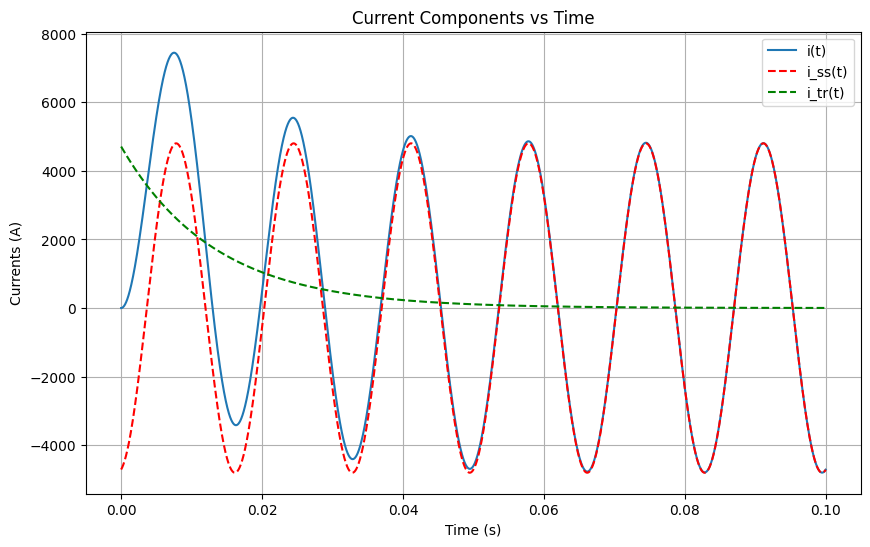

Peak instantaneous value of fault current: 7447 A
Peak steady-state value of fault current: 4804 A
I_asym to I_sym ratio: 1.55 for X/R ratio: 5.00


In [1]:
# Python code for computing fault current assuming a single-phase source
# with reactance X and resistance R. Voltage source defined by line voltage Vm, frequency f
# and fault point on wave (POW) angle theta.

import math # https://docs.python.org/3/library/math.html
import matplotlib.pyplot as plt     # https://matplotlib.org/

def current_vs_time(t, Vm, R, X, w, L, theta):
    """Calculate current i as a function of time t for a single-phase fault.
    Returns 3 values for current: (i) total current (ii) steady-state component
    (iii) transient component."""
    Imag = math.sqrt(2) * Vm / math.sqrt(R**2 + X**2)  # Steady-state peak magnitude
    i_ss = math.sin(w * t + theta - math.atan(w * L / R)) # Steady-state component
    i_tr = math.sin(theta - math.atan(w * L / R)) * math.exp(-(R / L) * t) # Transient decay
    return Imag * (i_ss - i_tr), Imag*i_ss, -Imag*i_tr

def plot_current_components(t_values, itotal_values, iss_values, itr_values):
    """Plot the current components vs time"""
    plt.figure(figsize=(10, 6)) # set width, height of plot
    plt.plot(t_values, itotal_values, label='i(t)')
    plt.plot(t_values, iss_values, 'r--', label='i_ss(t)')
    plt.plot(t_values, itr_values, 'g--', label='i_tr(t)')
    plt.title('Current Components vs Time')
    plt.xlabel('Time (s)')
    plt.ylabel('Currents (A)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Parameters
Vm = 24000/math.sqrt(3)  # 24kV line voltage, divide by sqrt(3) to get line-to-neutral
R = 0.8   # Representative R and X for source in Ohms
X = 4.0   # X/R ratio = 5
X_to_R_ratio = X/R
f = 60.0 # fundamental frequency, could also set to 50 Hz
w = 2 * math.pi * f  # Angular frequency
L = X/w  # Inductance in Henries
theta = 0.0  # Point on wave angle for fault; assume to be zero for now

# Time values list corresponding to 6 cycles of ac voltage source waveform
# Resolution set to 1024 points per cycle
t_values = [] # Set list to Null

for i in range(6*1024): # Adjust the time range and number of points as needed
    t_values.append(i * (1/f) / 1024)  # Delta t = (period in sec)/(samples per sec)

# Note can simplify 'for' loop above using List Comprehension
#t_values = [i * (1/f) / 1024 for i in range(6*1024)]

# Calculate current component values, put into list format
itotal_values = []
iss_values = []
itr_values = []
for t in t_values:
    i_total, i_ss, i_tr = current_vs_time(t, Vm, R, X, w, L, theta)
    itotal_values.append(i_total)
    iss_values.append(i_ss)
    itr_values.append(i_tr)

# Note can simplify for loop above by using List Comprehension.
# The 'zip' function returns a zip object, which is an iterator of tuples.
# This is needed since we are computing 3 different current lists for the plotting.
#itotal_values, iss_values, itr_values = zip(*[current_vs_time(t, Vm, R, X, w, L, theta) for t in t_values])

# Plot fault  current components
plot_current_components(t_values, itotal_values, iss_values, itr_values)

# Search current results to find instantaneous peak and steady-state peak and use
# these values to compute asymmetrical (instantaneous) peak to symmetrical (steady-state)
# peak ratio.
asymmetrical_current_peak = max(itotal_values)
print(f"Peak instantaneous value of fault current: {asymmetrical_current_peak:.0f} A")

symmetrical_current_peak = max(iss_values)
print(f"Peak steady-state value of fault current: {symmetrical_current_peak:.0f} A")

Iasym_Isym_ratio = asymmetrical_current_peak/symmetrical_current_peak
print(f"I_asym to I_sym ratio: {Iasym_Isym_ratio:.2f} for X/R ratio: {X_to_R_ratio:.2f}")

## Impact of DC Offset Transient

Although the DC component decays out quickly, this asymmetrical addition to the symmetrical current will still put stress on components in series with the fault.

When sizing a circuit breaker, we must make sure that not only will it break the fault current, but it must also handle the peak current stress during the first fault cycle.

In the time it takes to interrupt the fault, the DC offset current component will have typically decayed out. So by the time the circuit breaker operates open, the breaker just needs to interrupt the steady-state AC component of the fault current.

In example provided above, the circuit breaker needs to have a peak current withstand of at least 7447 A, but only needs to interrupt 4804 A.

## Fault Current Modeling Considerations

For a given source voltage, the fault current steady-state current magnitude is inversely proportional to the magnitude of the source impedance.  This magnitude can be computed using ac phasor analysis.

The transient DC offset is dependent on the X/R ratio and the voltage point on wave at which the fault occurs.

We do not know ahead of time the point on wave angle $\theta$ for the fault.  So we normally assume a worst-case value for sizing circuit breakers.  We will show the derivation of worst case point on wave angle $\theta$ later in this notebook.

If we know the steady-state fault current which determines the breaker interrupting duty, then can multiply by a worst case $I_{asym} / I_{sym}$ ratio to get the peak current duty requirement for the breaker.  

We will also show later in this notebook how to precompute this current ratio as a function of X/R ratio and worst case point on wave angle $\theta$.

## Python Code for Fault Current with Adjustable X/R and Theta

In order to see for yourself how the solution varies as a function of X/R ratio and point of wave angle $\theta$, execute the Python code provided below. Note this uses the Numpy array library instead of the Math library.

Adjust the slider widgets to vary the X/R ratio and fault point on wave angle to see the impact on the DC offset transient.  Note that as X/R ratio is changed, the program R & X are adjusted to keep the impedance magnitude constant.

Experiment with the slider widgets to determine:

1. As X/R ratio increases, what happens to the Peak to Steady-State Current ratio?
2. What values of the point on wave angle give the worst case DC offset?
3. What values of the point on wave angle give the minimum DC offset?
4. If we had a transmission circuit with X/R = 20 and distribution circuit with X/R = 5, then which circuit would have the larger DC offset transients?

In [2]:
# Computation and plotting of current as function of (i) X/R ratio and (ii) point on wave angle theta.
# Jupyter Notebook widgets used to adjust these two parameters and interactively update plots.
# Note that in this cell we make use of Numpy library calls instead of Math library.
import matplotlib.pyplot as plt
import numpy as np  # https://numpy.org/
from ipywidgets import interact, widgets

def current_vs_time(t, Vm, R, X, w, L, theta):
    """Current function from above Python cell is refactored for just total current output.
    Using Numpy library calls so output current is also of type Numpy."""
    Imag = np.sqrt(2) * Vm / np.sqrt(R**2 + X**2)  # Steady-state fault current magnitude
    i_ss = np.sin(w * t + theta - np.arctan(w * L / R)) # Steady-state sinusoidal component of fault current
    i_tr = np.sin(theta - np.arctan(w * L / R)) * np.exp(-(R / L) * t) # Transient decaying component of fault current
    return Imag * (i_ss - i_tr)

def voltage_vs_time(t, Vm, w, theta):
    """Computing voltage using numpy, result is also a Numpy array"""
    return np.sqrt(2) * Vm * np.sin(w * t + theta)

def plot_current(X_R_ratio, angle_theta):
    """Putting plot commands into a function, so can redo plots using
    widget interactive_plot function."""
    # Parameters
    Vm = 24e3/np.sqrt(3) # 24kV rms line voltage

    # In this exercise, when adjusting X_R_ratio, then want to keep impedance magnitude Z constant.
    # Keeping Z constant will ensure same steady-state fault current as X_R_ratio changed
    R_orig = 0.8   # same as above Python cell, but redefining here in case you want to change
    X_orig = 4.0
    Z_orig = np.sqrt(R_orig**2 + X_orig**2)
    R = Z_orig / np.sqrt(1 + X_R_ratio**2)
    X = X_R_ratio * R
    f = 60.0 # fundamental frequency
    w = 2 * np.pi * f  # Angular frequency
    L = X/w

    # Convert angle theta from degrees to radians, since widget input is in degrees
    angle_theta = np.radians(angle_theta)

    # By using Numpy library, can do array operations, rather than using 'for loops'.
    t_values = np.linspace(0, 12*(1/f), 12*1024)  # using more cycles since decay longer for high X/R
    # t_values is input Numpy array, output i_values is Numpy array
    i_values = current_vs_time(t_values, Vm, R, X, w, L, angle_theta)

    # Using Numpy array operations for voltage calculation as well
    v_values = voltage_vs_time(t_values, Vm, w, angle_theta)
    # print(type(t_values), type(i_values), type(v_values)) # type 'numpy.ndarray'

    asymmetrical_current_peak = max(np.abs(i_values)) # use abs() to account for negative offset
    print(f"Peak instantaneous magnitude of fault current: {asymmetrical_current_peak:.0f} A")
    symmetrical_current_peak = max(i_values[-1024:]) # Access last cycle of fault current
    print(f"Peak steady-state magnitude of fault current: {symmetrical_current_peak:.0f} A")
    Iasym_Isym_ratio = asymmetrical_current_peak/symmetrical_current_peak
    print(f"I_asym to I_sym ratio: {Iasym_Isym_ratio:.2f}")

    # Plotting calls below
    fig, ax1 = plt.subplots(figsize=(10, 6))

    color = 'tab:red' # Color 'red' from 'tab' color map
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('Current (A)', color=color)
    ax1.plot(t_values, i_values, label='Current (A)', color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.legend(loc='upper right')

    ax2 = ax1.twinx() # Second axis for voltage overlays on first current x-axis.
    color = 'tab:blue'
    ax2.set_ylabel('Voltage (V)', color=color)
    ax2.plot(t_values, v_values, label='Voltage (V)', linestyle='--', color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.legend(loc='lower right')

    # Set y-axis limits for the current axis
    ax1.set_ylim(-10000, 10000) # May need to adjust depending on current peak

    # fig.tight_layout() # Adjust plot layout to prevent overlaps
    plt.title('Fault Current and Source Voltage vs Time')
    plt.show()

# Create interactive widgets for adjusting X/R ratio and POW angle
X_R_ratio_widget = widgets.FloatSlider(value=1.0, min=1.0, max=20.0, step=0.1, description='X/R Ratio')
angle_theta_widget = widgets.FloatSlider(value=0.0, min=-180.0, max=180.0, step=5.0, description='Theta (deg.)')

# Create interactive plot
interactive_plot = interact(plot_current, X_R_ratio=X_R_ratio_widget, angle_theta=angle_theta_widget)

interactive(children=(FloatSlider(value=1.0, description='X/R Ratio', max=20.0, min=1.0), FloatSlider(value=0.…

## Peak Asymmetrical Fault Current as Function of $\theta$

For a given X/R ratio, the impact of the DC transient component depends on the point on wave of the voltage source at which the fault occurs.

- One brute force way to obtain the peak current for a given X/R ratio is to run the simulation for all possible values of $\theta$ and simply capture the peak from the various simulation runs.

- A second more elegant solution is to apply calculus to find maximum/minimum values associated with the zero slope of the fault current function.

To get the expression for zero slope, first take the partial of the fault current equation in (13) above with respect to $t$ and then $\theta$     . This will give us two equations.

Once we have these two partial derivative equations, we set them both to zero and solve these two equations simultaneously for time $t$ and $\theta$ .

## Fault Current Function Partial Derivatives

Starting from Equation (13), when we take the partials of that equation and set the results to 0, we get:

$$\frac{{\partial i}}{{\partial t}} = {I_{mag}}\left[ {\omega \cos \left( {\omega t + \theta  - {{\tan }^{ - 1}}\left( {\frac{X}{R}} \right)} \right) + \frac{R}{L}\sin \left( {\theta  - {{\tan }^{ - 1}}\left( {\frac{X}{R}} \right)} \right){e^{ - \frac{R}{L}t}}} \right]\; = 0 \tag{14} $$

$$ \frac{{\partial i}}{{\partial \theta }} = {I_{mag}}\left[ {\cos \left( {\omega t + \theta - {{\tan }^{ - 1}}\left( {\frac{X}{R}} \right)} \right) - \cos \left( {\theta - {{\tan }^{ - 1}}\left( {\frac{X}{R}} \right)} \right){e^{ - \frac{R}{L}t}}} \right]\; = 0 \tag{15}$$

Note ${I_{mag}} = \frac{{\sqrt 2 {V_M}}}{{\sqrt {{R^2} + {{\left( {\omega L} \right)}^2}} }}$
     is the symmetrical fault current magnitude, which will cancel out.

Obtain $\theta$ by solving Equation (14) for $\cos \left( {\omega t + \theta - {{\tan }^{ - 1}}\left( {\frac{X}{R}} \right)} \right)$ and substituting this into Equation (15) as shown on next slide.


## Solution for $\theta$ that Maximizes Current Magnitude

From Equation (14):
$\cos \left( {\omega t + \theta  - {{\tan }^{ - 1}}\left( {\frac{X}{R}} \right)} \right) =  - \frac{R}{{\omega L}}\sin \left( {\theta  - {{\tan }^{ - 1}}\left( {\frac{X}{R}} \right)} \right){e^{ - \frac{R}{L}t}} \tag{16}$

Substituting Equation (16) into (15):
$$ - \frac{R}{{\omega L}}\sin \left( {\theta - {{\tan }^{ - 1}}\left( {\frac{X}{R}} \right)} \right){e^{ - \frac{R}{L}t}} - \cos \left( {\theta - {{\tan }^{ - 1}}\left( {\frac{X}{R}} \right)} \right){e^{ - \frac{R}{L}t}} = 0 \tag{17}$$

Manipulating Equation (17) to find $\theta$, applying the trig identity for $tan(\theta - \phi)$ we get:

$$  \frac{X}{R} =  - \tan \left( {\theta  - {{\tan }^{ - 1}}\left( {\frac{X}{R}} \right)} \right) =  - \frac{{\tan (\theta ) + \tan \left( { - {{\tan }^{ - 1}}\left( {\frac{X}{R}} \right)} \right)}}{{1 - \tan (\theta )\tan \left( { - {{\tan }^{ - 1}}\left( {\frac{X}{R}} \right)} \right)}}\tag{18}$$

Finally refactoring Equation (18) gives us the final equation and two solutions:
$$\tan \left( \theta  \right)\left( {1 + \left( {\frac{{{X^2}}}{{{R^2}}}} \right)} \right) = 0\quad  with \; possible \;solutions \quad \theta  = 0 \;or\; \pi \tag{19}$$

## Equation for $t$ to Find Maximum Current Magnitude

The result that $\theta  = 0$ for maximizing the fault current peak makes sense since for a sinusoidal source, the inductor has a full half-cycle of the voltage source waveform to charge up from the initial condition of 0 A at the initiation of the fault.

The solution $\theta  = \pi$      corresponds to a change in polarity of the applied voltage and the inductor charging up to a maximum peak magnitude in the opposite direction. We get the same peak magnitude using either solution; just the polarities are changed.

Final equation we need to solve in order to find time $t$ corresponding to the peak fault current (assuming $\theta = 0$)      becomes:
  $$\omega \cos \left( {\omega t - {{\tan }^{ - 1}}\left( {\frac{X}{R}} \right)} \right) + \frac{R}{L}\sin \left( { - {{\tan }^{ - 1}}\left( {\frac{X}{R}} \right)} \right){e^{ - \frac{R}{L}t}}\; = 0 \tag{20}$$

Equation (20) is a transcendental equation which will require a numerical technique to solve. The Python code for performing this calculation is shown in the next calculation cell below.

## Python Code for Computing Peak Current Magnitude

Python cell computes the peak asymmetrical current, peak symmetrical current and their ratio as a function of X/R.  Values from the program output are summarized in Table 1.

We see that as the X/R ratio increases, the ratio of peak to symmetrical fault current increases as well.

However this ratio approaches an upper limit of 2 as X/R tends to infinity.

High X/R ratios are characteristic of transmission, while lower X/R ratios are typical of distribution systems.  So we see more pronounced offsets in transmission applications or for faults on distribution near the substation where reactance still dominates.

<br>
Table 1 DC Transient Offset as function of X/R Ratio

| X/R Ratio    | 20    | 10    | 5     | 3     | 1     |
| ------------ | ----- | ----- | ----- | ----- | ----- |
| I_asym/I_sym | 1.857 | 1.737 | 1.550 | 1.379 | 1.069 |



In [3]:
# Python code for computing peak fault current using calculus.
# This code defines the current function to be solved in a format suitable for
# 'fsolve' and then uses fsolve to numerically find the values of t
# that satisfy the equation. This is then substituted back into the current expression
# in order to produce a table that shows relationship between X/R ratio and peak
# to symmetrical current ratio.

import numpy as np
from scipy.optimize import fsolve   # https://scipy.org/

def equation_for_t(t, X, R, L, w):
    """Define the equation to be solved for t"""
    return w * np.cos(w * t - np.arctan(X / R)) + (R / L) * np.sin(-np.arctan(X / R)) * np.exp(-R * t / L)

def current_function(t, X, R, L, w, Imag):
    """Define the current function we will evaluate once we have found t"""
    return Imag * (np.sin(w * t - np.arctan(X / R)) - np.sin(-np.arctan(X / R)) * np.exp(-R * t / L))

# Define constants.  Note the the current ratio as function of
# X/R is not dependent on Vm or impedance magnitude.  Just the ratio of X to R.
Vm = 24e3/np.sqrt(3)  # rms line voltage divided by sqrt(3)
f = 60.0  # fundamental frequency
w = 2 * np.pi * f  # Angular frequency

# When adjusting X_R_ratio, want to keep impedance magnitude Z constant
# Keeping Z constant will give us the same steady-state fault current as X_R_ratio changes.
# Note that the end table we produce which shows how X/R ratio impacts Iasym/Isym ratio is
# not dependent on Imag (Isym=Imag), since that term will cancel out.
R_orig = 0.8
X_orig = 4.0
Z_orig = np.sqrt(R_orig**2 + X_orig**2)
Imag = np.sqrt(2) * Vm / Z_orig  # Imag is instantaneous steady-state current magnitude

# Vary X/R from 1 to 20
X_R_values = np.linspace(1, 20, 20)

# Store results in a table
results_table = []

for X_R in X_R_values:
    R = Z_orig / np.sqrt(1 + X_R**2)
    X = X_R * R  # Set X based on the ratio
    L = X / w

    # Solve Eqn. (20) in notebook for t using numerical solver 'fsolve' from Scipy library.
    # Note as initial condition for t, we take Eqn (13) and solve for time t
    # for which sine term on left is initially maximized (i.e. w*t-atan(X/R)=pi/2).
    t_initial = (np.pi/2 + np.arctan(X/R)) / w
    t_solution = fsolve(equation_for_t, t_initial, args=(X, R, L, w))[0]

    # Calculate the peak current at t_solution using the provided current function
    peak_current = current_function(t_solution, X, R, L, w, Imag)

    # Store the results in a table using 'dictionary' data object
    results_table.append({
        'X_R_ratio': X_R,
        'I_asym': peak_current,
        'I_sym': Imag,
        'I_asym/I_sym': peak_current / Imag
    })

# Print the results table
print("X_R_ratio\tI_asym\tI_sym\tI_asym/I_sym")
for result in results_table:
    print(f"{result['X_R_ratio']:.1f}\t\t{result['I_asym']:.0f}\t{result['I_sym']:.0f}\t{result['I_asym/I_sym']:.3f}")


X_R_ratio	I_asym	I_sym	I_asym/I_sym
1.0		5137	4804	1.069
2.0		5965	4804	1.242
3.0		6622	4804	1.379
4.0		7097	4804	1.477
5.0		7447	4804	1.550
6.0		7714	4804	1.606
7.0		7923	4804	1.649
8.0		8091	4804	1.684
9.0		8228	4804	1.713
10.0		8343	4804	1.737
11.0		8441	4804	1.757
12.0		8524	4804	1.774
13.0		8596	4804	1.789
14.0		8660	4804	1.803
15.0		8716	4804	1.814
16.0		8765	4804	1.825
17.0		8810	4804	1.834
18.0		8850	4804	1.842
19.0		8886	4804	1.850
20.0		8919	4804	1.857


## Worked Example One

Suppose we have a 34.5 kV substation supplying a distribution system at 60 Hz as shown (next slide). The equivalent Thevenin impedance for the single-phase fault is Z=1+j5 Ohms.

1. Determine both the rms and peak values of the steady-state component of the fault current.

2. Determine the point on wave angle $\theta$ for a fault that occurs when instantaneous voltage is equal to 10 kV with voltage increasing.

3. Plot the fault current as function of time based on the above point on wave angle for the first 6 cycles.

4. Determine the peak instantaneous current for this case.


## 34.5 kV Substation Fault Scenario

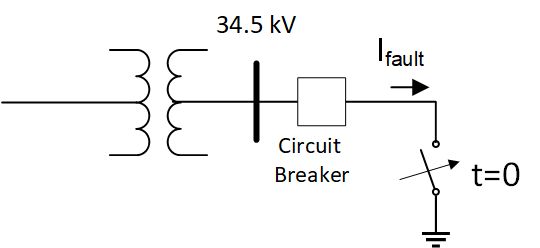

Figure 7. 34.5 kV System One Line Diagram


## Source Voltage and Impedance Modeling

In this example we model the equivalent voltage source as a sine waveform, which for a 34.5 kV line voltage gives us
$$ {v_s}\left( t \right) = \frac{{\sqrt 2 }}{{\sqrt 3 }}34.5 \times {10^3}\sin \left( {\omega t + \theta } \right)
\tag{21} $$

For a source reactance of 5.0 Ohms, then we convert this to an inductance, where

$L = \frac{X}{\omega } = \frac{X}{{2\pi  \times 60}}$.

The various model parameters are entered and converted in the code cell below.

In [4]:
import numpy as np # will use numpy instead of math, since will do array operations later

Vm = 34.5e3/np.sqrt(3) # line to neutral rms
R = 1.0
X = 5.0
f = 60.0
w = 2*np.pi*f
L = X/w
print(f"Vm= {Vm:.0f} V, w = {w:.0f} Rad/s, L= {L:.5f} Henries, R= {R} Ohms")

Vm= 19919 V, w = 377 Rad/s, L= 0.01326 Henries, R= 1.0 Ohms


## Steady-State Component of Fault Current

The steady-state rms component of the fault current is determined using phasor analysis:

$${\tilde I_{rms}} = \frac{{{V_M}\angle \theta }}{Z} = \frac{{{V_M}}}{{\sqrt {{R^2} + {{\left( {\omega L} \right)}^2}} }}\angle \theta  - \phi  = \frac{{{V_M}}}{{\sqrt {{R^2} + {{\left( {\omega L} \right)}^2}} }}\angle \theta  - {\tan ^{ - 1}}\left( {\frac{{\omega L}}{R}} \right)
\tag{22}
$$

The rms magnitude of the steady-state component  of the fault current (calculated in code cell below) is 3906 A. The phase value $\theta$ is a function of voltage point on wave of when switching occurs and still needs to be determined.

Multiplying the rms current value of 3906.4 A by $\sqrt 2$ gives us the peak magnitude of 5524.4 A. And so the steady-state fault current component as a function of $t$ after the fault occurs and the point of wave angle (still to be determined) is

$${i_{ss}}(t) = 5524.4\sin \left( {\omega t + \theta  - {{78.7}^o}} \right)\quad A \tag{23}$$


In [5]:
Z = np.sqrt(R**2 + (w*L)**2)
Irms = (Vm/Z)
phi = np.arctan(w*L/R)
Imag = np.sqrt(2)*Irms  # zero to peak magnitude
print(f"Irms= {Irms:.1f}, phi= {(180*phi/np.pi):.1f} degrees, Imag(zero_to_peak)= {Imag:.1f} A")

Irms= 3906.4, phi= 78.7 degrees, Imag(zero_to_peak)= 5524.4 A


## Voltage Source Model

In this case we are told that the fault occurs when the source voltage is 10,000 V at the inception of the fault at $t=0$. So substituting this into the voltage expression above gives us the following relationship for $\theta$:
$${v_s}(t = 0) = 10,000 = 28,169\sin (\theta ) \tag{24}$$

We then solve for the possible point on wave angles, based on the voltage magnitude constraint, in the Python cell below.

In [6]:
theta1 = np.arcsin(10000/(np.sqrt(2)*Vm))
theta2 = np.pi - theta1
print(f"theta1 = {(180*theta1/np.pi):.3} degrees")
print(f"theta2 = {(180*theta2/np.pi):.4} degrees")

theta1 = 20.8 degrees
theta2 = 159.2 degrees


## Selection of Point of Wave Angle Option

Given only the voltage magnitude constraint, there are two possible solutions: +20.8 degrees and +159.2 degrees. So we need to make sure we choose the correct of these two options.

Let us go ahead and plot the source voltage for both of these angles in the Python cell below. What we see from these plots is that we need to use the value of 20.8 degrees. It is only for this case that voltage is increasing at t=0, as specified in the problem statement.

So the point on wave angle $\theta = +20.8$ degrees.


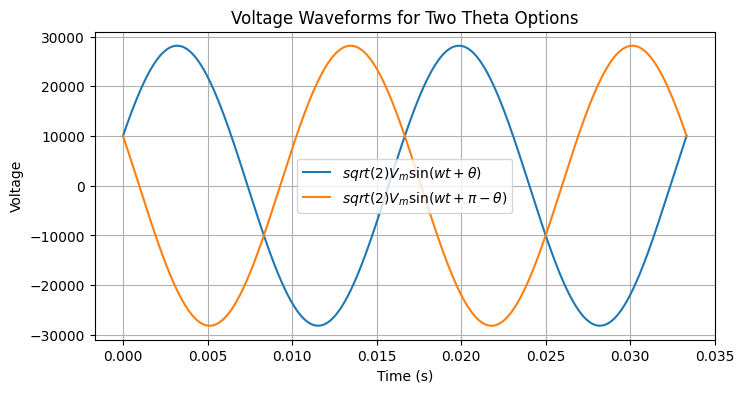

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Time vector for 2 cycles
t = np.linspace(0, 2*(1/f), num=2*1024, endpoint=True)

# Voltage waveforms
voltage1 = np.sqrt(2) * Vm * np.sin(w * t + theta1)
voltage2 = np.sqrt(2) * Vm * np.sin(w * t + theta2)

# Plotting
plt.figure(figsize=(8, 4))
plt.plot(t, voltage1, label=r'$sqrt(2) V_m \sin(wt + \theta)$')
plt.plot(t, voltage2, label=r'$sqrt(2) V_m \sin(wt + \pi - \theta)$')
plt.title('Voltage Waveforms for Two Theta Options')
plt.xlabel('Time (s)')
plt.ylabel('Voltage')
plt.legend()
plt.grid(True)
plt.show()


## Transient Component of Fault Current

Now that we have the steady-state current, we can find the transient component of the solution as follows
$$  \begin{array}{*{20}{l}}
{{i_{tr}}\left( t \right) = \frac{{\sqrt 2 {V_M}}}{{\sqrt {{R^2} + {{\left( {\omega L} \right)}^2}} }}\left( { - \sin \left( {\theta  - {{\tan }^{ - 1}}\left( {\frac{{\omega L}}{R}} \right)} \right){e^{ - \frac{R}{L}t}}} \right)}\\
{ =  - {I_{mag}}\left( {\sin \left( {\theta  - {{\tan }^{ - 1}}\left( {\frac{{\omega L}}{R}} \right)} \right){e^{ - \frac{R}{L}t}}} \right)}
\end{array} \tag{25}$$

Finally combining the steady-state and transient portions
$$ \begin{array}{l}
i\left( t \right) = {i_{ss}}(t) + {i_{tr}}(t) = \\
{I_{mag}}\left[ {\sin \left( {\omega t + \theta  - {{\tan }^{ - 1}}\left( {\frac{{\omega L}}{R}} \right)} \right) - \sin \left( {\theta  - {{\tan }^{ - 1}}\left( {\frac{{\omega L}}{R}} \right)} \right){e^{ - \frac{R}{L}t}}} \right]
\end{array}\tag{26}$$


## Final Form of Fault Current Solution

Substituting in for the point of wave angle and other parameters, we get the final solution for current that we want to plot:

$$ i\left( t \right) = {5524}\left[ {\sin \left( {\omega t + {{20.8}^o} - {{78.7}^o}} \right) - \sin \left( {{{20.8}^o} - {{78.7}^o}} \right){e^{ - 75.4t}}} \right]\tag{27} $$

Equation (27) and (21) gives us the final set of waveforms as plotted by the Python cell that follows.

The peak instantaneous current is 8345.9 A.

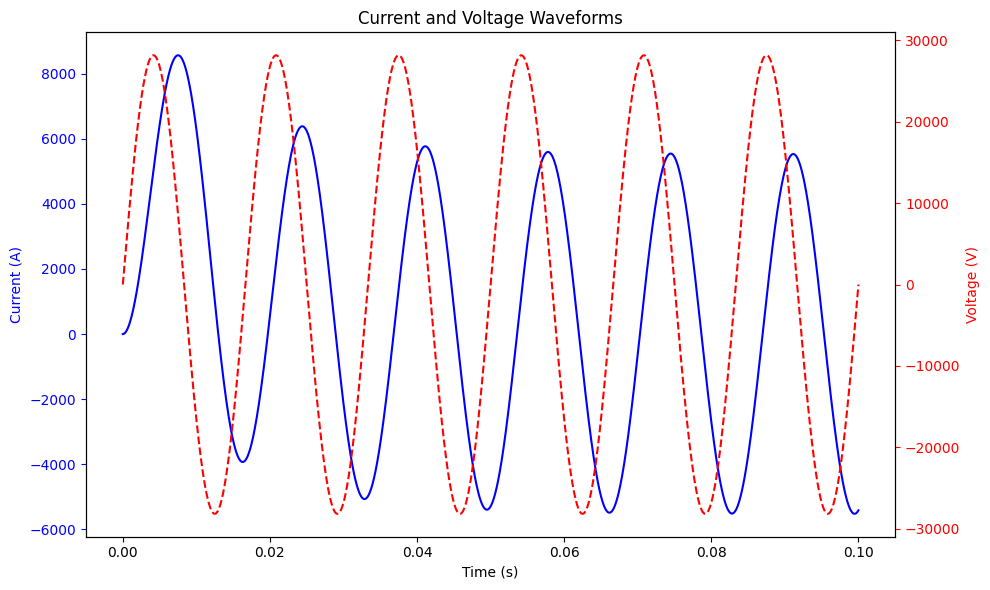

Peak Instantaneous Current:  8564.2 A


In [8]:
import numpy as np
import matplotlib.pyplot as plt

def plot_waveforms(t, current, voltage):
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot current on the primary y-axis
    ax1.plot(t, current, 'b', label='Current')
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('Current (A)', color='b')
    ax1.tick_params('y', colors='b')

    # Create a secondary y-axis for voltage
    ax2 = ax1.twinx()
    ax2.plot(t, voltage, 'r--', label='Voltage')
    ax2.set_ylabel('Voltage (V)', color='r')
    ax2.tick_params('y', colors='r')

    # Title and legend
    plt.title('Current and Voltage Waveforms')
    fig.tight_layout()
    plt.show()

# Time array for 6 cycles (0 to 0.1 seconds), 1024 points per cycle
t = np.linspace(0, 6*(1/f), num=6*1024, endpoint=True)

# Current waveform obtained by combining steady-state and transient components
current = Imag * (np.sin(w * t + theta - np.arctan(w * L / R)) -
                  np.sin(theta - np.arctan(w * L / R)) * np.exp(-(R/L) * t))

# Voltage waveform
voltage = np.sqrt(2) * Vm * np.sin(w * t + theta)

# Call the plotting function
plot_waveforms(t, current, voltage)

# Peak current value
peak_current = np.max(current)
print(f"Peak Instantaneous Current:  {peak_current:.1f} A")


## Worked Example Two

Let us now modify the scenario discussed in Example One above. we will add two modeling changes to make the current waveform appear more similar to what would be seen by a relay controlling the breaker.
- Impact of a 30 MW prefault resistive load as connected in Fig. 5.
- What occurs when the fault is cleared in our simulation. In this case we will assume breaker contact opening occurs at 6 cycles after fault inception.

1. Determine the rms magnitude of the prefault current and plot this as a function of time.
2. Determine instantaneous current value at the time of the fault (assuming $\theta = 0$).
3. Plot the fault current as function of time for breaker operation at 6 cycles with fault clearing at zero crossing.
4. Plot the postfault current assuming the resistive load has not tripped.
5. Add the prefault, fault and postfault curves together.


## Fault Scenario with Added Load

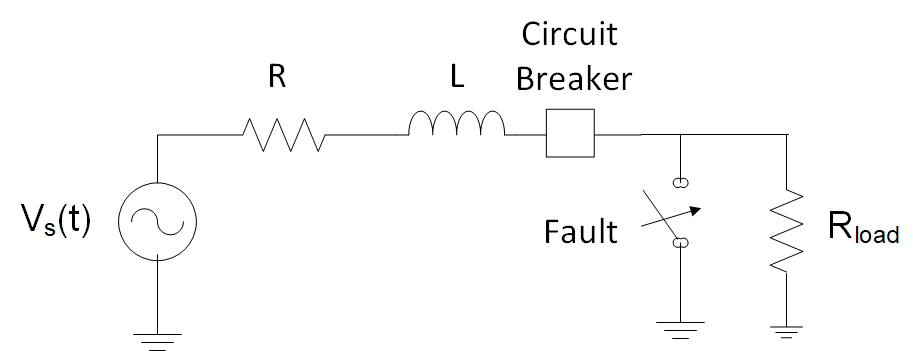

Figure 8. RL Circuit Model with Load Added


## Prefault Circuit Load Impedance

Instead of the prefault current being 0 A, we now have an initial value for the inductor current at the start of the fault. Assuming the load is resistive, we can find the equivalent per-phase load resistance ${R_{load}}$ based on a grounded-wye model from ${P_{load}} = \frac{{V_{line}^2}}{{{R_{load}}}}$. This is computed in the Python cell below.

To obtain the prefault current, we perform a phasor analysis based on the net series impedance, where
$$ {Z_{prefault}} = \left( {R + {R_{load}}} \right) + j\omega L = \sqrt {{{\left( {R + {R_{load}}} \right)}^2} + {{\left( {\omega L} \right)}^2}} \angle \phi \tag{28}$$
and
$$ \phi = {\tan ^{ - 1}}\left( {\frac{{\omega L}}{{\left( {R + {R_{load}}} \right)}}} \right) \tag{29}$$


## Prefault Circuit Current
The prefault current is now obtained by phasor analysis using this impedance, where

$${\tilde I_{prefault}} = \frac{{{V_M}\angle \theta }}{Z} = \frac{{{V_M}}}{{\sqrt {{\left( {R + {R_{load}}} \right)^2} + {{\left( {\omega L} \right)}^2}} }}\angle \theta  - \phi \tag{30}$$

which in the time domain converts to
$$ {i_{prefault}}(t) = \frac{{\sqrt 2 {V_M}}}{{\sqrt {{{\left( {R + {R_{load}}} \right)}^2} + {{\left( {\omega L} \right)}^2}} }}\sin \left( {\omega t + \theta - \phi } \right) \tag{31}$$

The Python code for computing the impact of the prefault load is provided in the cell below. The plot shows the current as a function of time up until the point of the fault. Note since the prefault circuit is dominated by the load resistance, that the voltage and current are almost in phase.


L= 0.01326 Henries, R= 1.0 Ohms, Rload = 39.675 Ohms
RMS Value of Prefault Current = 486.04 A
Magnitude of Prefault Current = 687.37 A


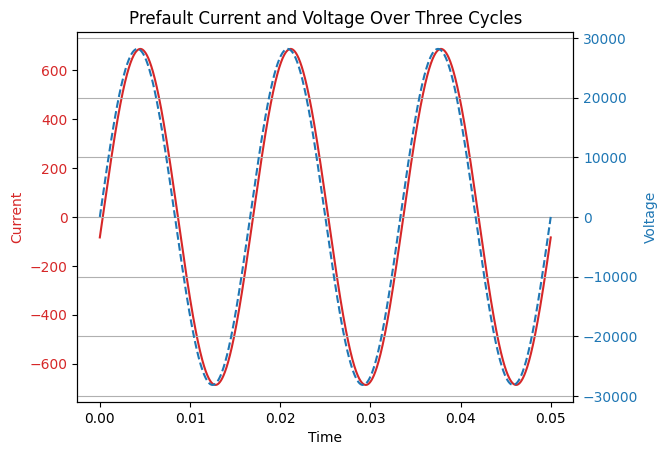

Instantaneous current at end of 3 cycles = -83.86 A


In [9]:
import numpy as np
import matplotlib.pyplot as plt

def plot_current_voltage(t, i, v):
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Current', color=color)
    ax1.plot(t, i, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Voltage', color=color)
    ax2.plot(t, v, color=color, linestyle='--')
    ax2.tick_params(axis='y', labelcolor=color)

    plt.title('Prefault Current and Voltage Over Three Cycles')
    plt.grid(True)
    plt.show()

Vm = 34.5e3/np.sqrt(3)
R = 1.0
X = 5.0  # Same R, X as Example One
f = 60.0
w = 2*np.pi*f
L = X/w
Pload = 30e6
Rload = 34.5e3**2/Pload # Assuming Rload for nominal voltage

print(f"L= {L:.5f} Henries, R= {R} Ohms, Rload = {Rload} Ohms")

# Prefault Calculation
Z = np.sqrt((R+Rload)**2 + (w*L)**2)
Irms_pre = (Vm/Z)
phi_pre = np.arctan(w*L/(R+Rload))
theta = 0.0  # in this case assumed prefault voltage source angle
print(f"RMS Value of Prefault Current = {Irms_pre:.2f} A")
print(f"Magnitude of Prefault Current = {np.sqrt(2)*Irms_pre:.2f} A")

# Time values for three cycles, 1024 points per cycle
t_pre = np.linspace(0, 3 * (1/f), 3*1024)

# Calculate current
i_pre = np.sqrt(2) * Irms_pre * np.sin(w * t_pre + theta - phi_pre)

# Calculate voltage
v_pre = np.sqrt(2) * Vm * np.sin(w * t_pre + theta)

# Plotting current and voltage for prefault
plot_current_voltage(t_pre, i_pre, v_pre)

# Prefault current at 3 cycles
I_pre = i_pre[-1] # last point in prefault current array
print(f"Instantaneous current at end of 3 cycles = {I_pre:.2f} A")


## Initial Value for Fault Current

Since we have a prefault load, the intial value for the fault current will not be be 0 A as in Example One.

Also we have a series inductance, so the current cannot change instanteously at the switching transition.  It follows that the final instantaneous prefault load current calculated above becomes the initial instantaneous fault current at the fault transition.

Assuming that the fault occurs when the source voltage is zero and increasing (at 3 cycles), then the initial condition for the fault current is $I_{pre} = i_{pre}(0.05)=-83.86 A$.

We now need to modify Equations (11)-(13) above to account for the prefault current. Note we will reset the time scale $t$, such that $t=0$ refers to the inception of the fault.  This will allow us to use similar equations for the fault current as derived earlier.  We will add the appropriate time shifts when making the final plot later in this notebook. And so the intial condition for the fault current is now

$$ i\left( 0 \right) = i\left( {{0^ - }} \right) = {I_{pre}} \tag{32}$$


## Application of Intial Value to Fault Current Calculation

Now when we apply this initial condition to solve for A, we now find that
$$ A = {I_{pre}} - \frac{{\sqrt 2 {V_M}}}{{\sqrt {{R^2} + {{\left( {\omega L} \right)}^2}} }}\sin \left( {\theta - \varphi } \right) \tag{33}$$
Finally
$$ i\left( t \right) = \frac{{\sqrt 2 {V_M}}}{{\sqrt {{R^2} + {{\left( {\omega L} \right)}^2}} }}\left( {\sin \left( {\omega t + \theta - {{\tan }^{ - 1}}\left( {\frac{{\omega L}}{R}} \right)} \right) - \left[ { - {I'_{pre}} + \sin \left( {\theta - {{\tan }^{ - 1}}\left( {\frac{{\omega L}}{R}} \right)} \right)} \right]{e^{ - \frac{R}{L}t}}} \right) \tag{34}$$

where the ${I'_{pre}}$ term refers to the original value of ${I_{pre}}$      divided by the steady-state current magnitude.

Recall that we have reset the time $t$ in Equation (34) with respect to the prefault current $t$ used in Equation (31). This is possible since the solution for the fault current is only linked to the prefault current via the initial condition.

In the Python cell below, we use Equation (34) and the initial condition to plot the fault current for 7 cycles. This is not the final fault current plot, since we still need to make an adjustment for the breaker fault clearing time.

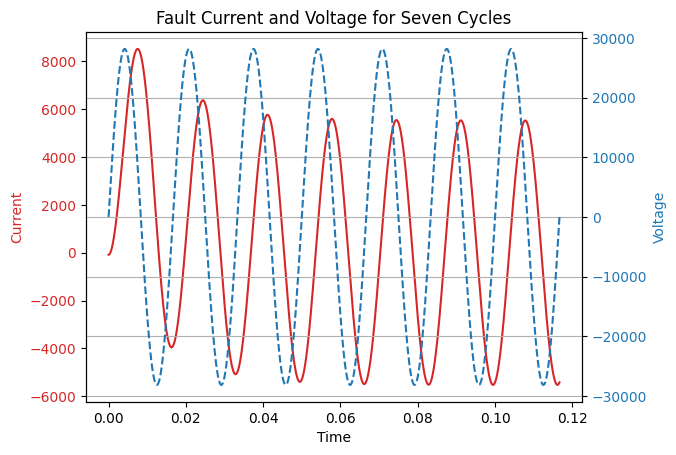

Peak Instantaneous Fault Current:  8516.7 A


In [10]:
import numpy as np
import matplotlib.pyplot as plt

def plot_current_voltage(t, i, v):
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Current', color=color)
    ax1.plot(t, i, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Voltage', color=color)
    ax2.plot(t, v, color=color, linestyle='--')  # Dashed line for voltage
    ax2.tick_params(axis='y', labelcolor=color)

    plt.title('Fault Current and Voltage for Seven Cycles')
    plt.grid(True)
    plt.show()

# Constants
Z = np.sqrt((R)**2 + (w*L)**2)
Irms_fault = (Vm/Z)
phi_fault = np.arctan(w*L/R)
theta = 0.0  # point on wave angle

# Time values for seven cycles
t_fault = np.linspace(0, 7 * (1/f), 7*1024)

# Calculate current and voltage
i_fault = np.sqrt(2) * Irms_fault * (np.sin(w * t_fault + theta - phi_fault) -
        (-I_pre/(np.sqrt(2)*Irms_fault) + np.sin(theta - phi_fault)) * np.exp(-(R/L) * t_fault))

v_fault = np.sqrt(2) * Vm * np.sin(w * t_fault + theta)

# Plotting fault current and voltage
plot_current_voltage(t_fault, i_fault, v_fault)

# Peak current value
peak_current = np.max(i_fault)
print(f"Peak Instantaneous Fault Current:  {peak_current:.1f} A")


## Modeling of Relay and Circuit Breaker Zero Crossing Constraint
     
- Protection operation sequence is illustrated below (next slide). The steps include:     
    1. Relay detecting the fault (Fault Trigger).
    2. Relay deciding to operate the breaker (Fault Clear).
    3. Circuit Breaker mechanism operation to open contacts (CB Operation).
    4. Fault current clearing at a natural current zero.
    
- During the circuit breaker operation process, the circuit breaker does not instantaneously interrupt the fault current. Rather as the contacts open in the circuit breaker, an arcing occurs which allows the fault current to continue flowing. The arcing generally occurs until a natural current zero is reached.
    * In some cases it is possible for current to be instantaneously interrupted, and this phenomena is called Current Chopping.     
    * Circuit breakers in transient analysis programs typically have built-in logic for handling either the zero-crossing or current chop scenarios.

- The Python code snippet shown below shows how we account for the time for when this zero crossing occurs. Note that this will also define the initial conditions for a second transient that occurs right after the fault is cleared.
      
- In a later step we will compute the postfault current, with time of fault clearing = 0 for a new time reference frame.


## Relay and Breaker Response to Fault

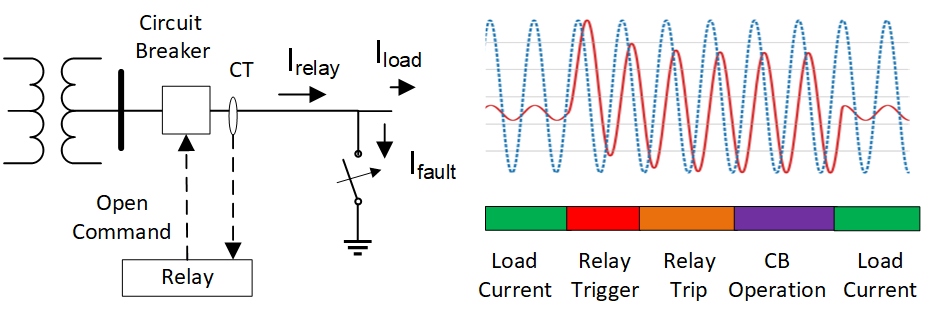

Figure 9. Sequence of Relay and Breaker Operations during Fault

In [11]:

# six_cycle_index is fault current array index corresponding to 6 cycles into the fault
six_cycle_index = np.argmax(t_fault > 6 * 2 * np.pi / w)

# We are searching through the fault waveform (from 6 -> 7 cycles of data) for the
# array index corresponding to a current zero.  Since we have a finite resolution,
# we need to use an error tolerance (0.005) with respect to the fault current magnitude.
# We can get better resolution by having more than 1024 points per cycle, but this will add to time
# and memory requirements of algorithm.
zero_current_index = np.where(np.abs(i_fault[six_cycle_index:]) < np.sqrt(2)*Irms_fault*5e-3)[0][0]
index_of_zero_current = six_cycle_index + zero_current_index
time_of_zero_current = t_fault[index_of_zero_current]

print(f'Index of time when current becomes 0: {index_of_zero_current}')
print(f'Time when current becomes 0 after 6 cycles: {time_of_zero_current:.4f} seconds')
print(f"Instaneous Voltage at this time: {v_fault[index_of_zero_current]:.2f} V")
theta_post = np.arcsin(v_fault[index_of_zero_current]/(Vm*np.sqrt(2)))
print(f"Theta for postfault voltage: {((180/np.pi)*theta_post):.2f} degrees")

Index of time when current becomes 0: 6367
Time when current becomes 0 after 6 cycles: 0.1036 seconds
Instaneous Voltage at this time: 27624.10 V
Theta for postfault voltage: 78.71 degrees


## Updated Fault Current Plot to Include Current Interruption Constraint

We now use the above index for when current becomes zero to produce an updated fault current plot as shown in the Python cell below.

Note that the final voltage of 27624.1 V and final current of 0 A will be used as initial conditions for the post-fault current calculation that follows.

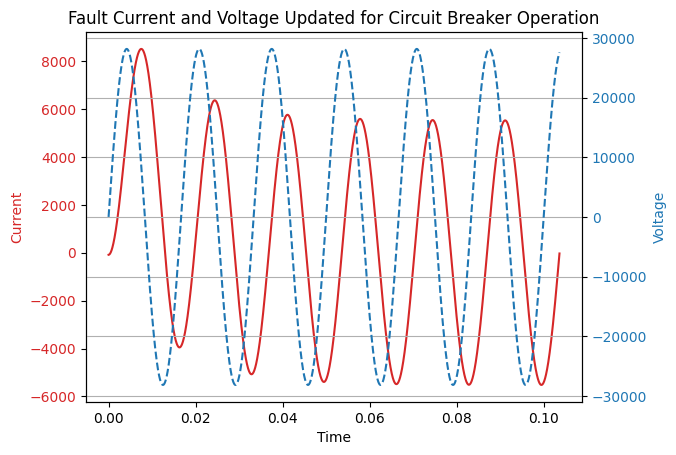

In [12]:

import matplotlib.pyplot as plt

def plot_current_voltage(t, i, v):
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Current', color=color)
    ax1.plot(t, i, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Voltage', color=color)
    ax2.plot(t, v, color=color, linestyle='--')  # Dashed line for voltage
    ax2.tick_params(axis='y', labelcolor=color)

    plt.title('Fault Current and Voltage Updated for Circuit Breaker Operation')
    plt.grid(True)
    plt.show()

# Utilize index_of_zero_current calculated above
t_fault_update = t_fault[:index_of_zero_current]
i_fault_update = i_fault[:index_of_zero_current]
v_fault_update = v_fault[:index_of_zero_current]

# Updated fault current and voltage plot
plot_current_voltage(t_fault_update, i_fault_update, v_fault_update)

## Equation for Post Fault Transient

Finally we solve the differential equation for the postfault current, which is similar to Equation (13). But now we have a series resistance which is augmented by the load resistance as shown below:

$$ i\left( t \right) = \frac{{\sqrt 2 {V_M}}}{{\sqrt {{R^2} + {{\left( {\omega L} \right)}^2}} }}\left( {\sin \left( {\omega t + \theta - {{\tan }^{ - 1}}\left( {\frac{{\omega L}}{{R + {R_{load}}}}} \right)} \right) - \sin \left( {\theta - {{\tan }^{ - 1}}\left( {\frac{{\omega L}}{{R + {R_{load}}}}} \right)} \right){e^{ - \frac{R}{L}t}}} \right) \tag{35}$$

Using the value of theta computed above, the computation and plotting of the postfault for 3 cycles is provided in the Python cell below.

What is interesting about the transition from fault to postfault current caused by the circuit breaker operation, is that you do not see much current offset like we did at the initiation of the fault. The current very quickly transitions from 0 A to the steady-state load current waveform.

The reason we do not see much DC offset is that the X/R ratio is extremely low. As a result, the exponential DC term is small.


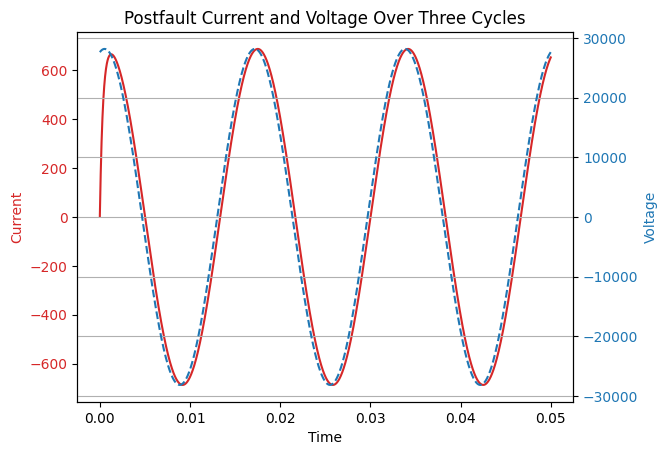

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def plot_current_voltage(t, i, v):
    # Plotting current on the primary axis
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Current', color=color)
    ax1.plot(t, i, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    # Creating a secondary axis for voltage
    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Voltage', color=color)
    ax2.plot(t, v, color=color, linestyle='--')  # Dashed line for voltage
    ax2.tick_params(axis='y', labelcolor=color)

    plt.title('Postfault Current and Voltage Over Three Cycles')
    plt.grid(True)
    plt.show()

# Constants
Z = np.sqrt((R + Rload)**2 + (w * L)**2)
Irms_post = (Vm / Z)
phi_post = np.arctan(w * L / (R + Rload))

# Time values for three cycles
t_post = np.linspace(0, 3 * (1 / f), 3 * 1024)

# Calculate current and voltage
i_post = np.sqrt(2) * Irms_post * (np.sin(w * t_post + theta_post - phi_post) -
                                   np.sin(theta_post - phi_post) * np.exp(-((R + Rload) / L) * t_post))
v_post = np.sqrt(2) * Vm * np.sin(w * t_post + theta_post)

# Call the plotting function
plot_current_voltage(t_post, i_post, v_post)


## Final Current Waveform

Finally putting the prefault, fault and postfault curves together gives us the final result shown in the plot, below with a common time axis.

In this case we combine the prefault, fault and postfault Numpy arrays together to get the final current.

Since we solved the equations for fault and postfault using $t=0$ as reference for each of the three scenarios, then we need to adjust the t_fault and t_postfault arrays containing the time points using an appropriate time offset. This is all done in the Python cell below.


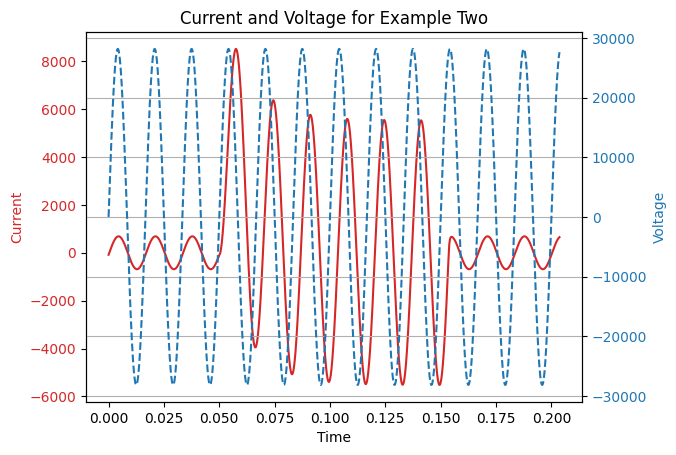

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def plot_current_voltage(i_total, v_total, t_total):
    # Plotting current on the primary axis
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Current', color=color)
    ax1.plot(t_total, i_total, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    # Creating a secondary axis for voltage
    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Voltage', color=color)
    ax2.plot(t_total, v_total, color=color, linestyle='--')  # Dashed line for voltage
    ax2.tick_params(axis='y', labelcolor=color)
    plt.title('Current and Voltage for Example Two')
    plt.grid(True)
    plt.show()

# Concatenate points in pre, fault and post current and voltage arrays
i_total = np.concatenate((i_pre, i_fault[1:index_of_zero_current], i_post))
v_total = np.concatenate((v_pre, v_fault[1:index_of_zero_current], v_post))

# Need to reconstruct time array using time offsets to get all points on common time axis
t_fault_offset = 3*(1/60)
t_post_offset = t_fault_offset + t_fault[index_of_zero_current]
t_fault = t_fault + t_fault_offset # Numpy operation whereas t_fault_offset added to every entry in array
t_post = t_post + t_post_offset # Numpy operation where t_post_offset added to every entry in array
t_total = np.concatenate((t_pre, t_fault[1:index_of_zero_current], t_post)) # Combine time arrays

plot_current_voltage(i_total, v_total, t_total)


## Example Two Results Discussion

The current waveform provided above is similar to what would be captured in circuit breaker relay waveform oscillographic recordings triggered by this type of event.  

One sees the prefault load current followed by the fault current, which is evident by the rapid increase in current.

Even though the oscillographic recording is triggered by the fault current transition, these recording usually also include a predefined number of prefault cycles.

Then once the fault is cleared, the circuit returns to its prefault state.  

In real circuits, certain loads could trip during the low-voltage conditions caused by the fault.  So post-fault load could be less than pre-fault load.  Also if there is non-resistive load, one could also see an inrush of real and reactive power once the fault is cleared, due to motor restarts.


## Benchmarking Examples using PSCAD

Whenever you write your own simulation code, it is helpful to benchmark the results using either a commericial analysis program or a case study with complete results.

In this case we will compare the results of Example One and Example Two with PSCAD Free (https://www.pscad.com/software/pscad/free-edition). PSCAD is specifically designed for power system transient analysis. The 'Free' version is a reduced-capability version released for noncommerical purposes, such as university courses.  

PSCAD uses numerical integration techniques to solve as opposed to the specific closed-form solution developed in this notebook.


## Example One Benchmark

The circuit constructed in PSCAD to replicate Example One is shown in Fig. 7 below.

This shows a voltage source behind a resistance and reactance, using the same values as the Python code. The voltage source defaults to a sine wave and we put in the phase shift of 20.8 degrees as shown in Fig. 8.

The fault in this case is modeled with a circuit breaker connected to ground which is triggered to close as shown in Fig. 8.

When the program is executed, the current and voltage plots are generated as given in Fig. 9. If we use the cursor control, we see an asymmetrical peak of 8342 A and a symmetrical peak of 5530, which matches closely to the corresponding results of 8346 and 5524 computed in the Python code.

Results will not match exactly due to integration error (based on timestep chosen) in the numerical technique and the differences of resolution in the number of plotting points.



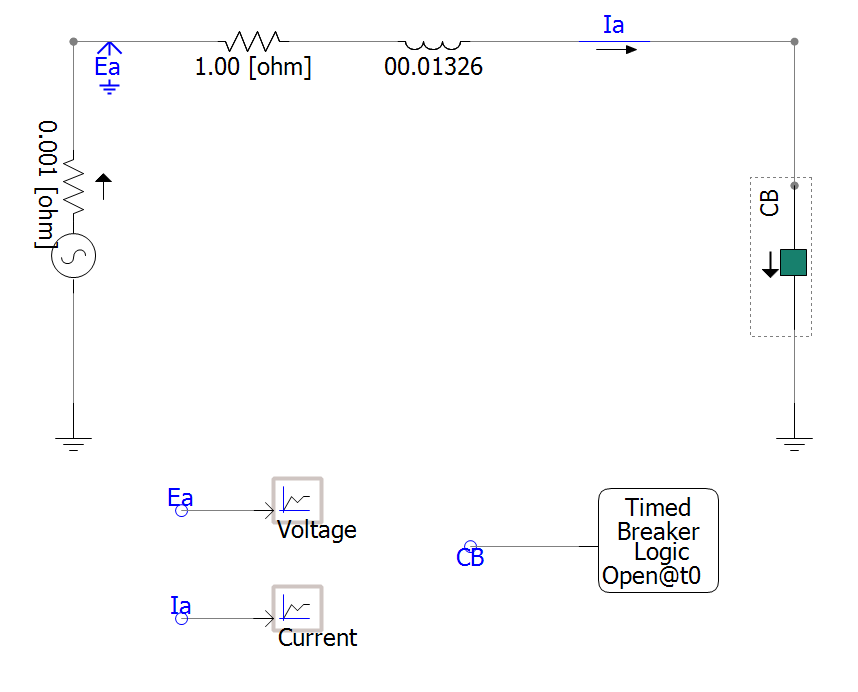

Figure 10. Example One RL Circuit



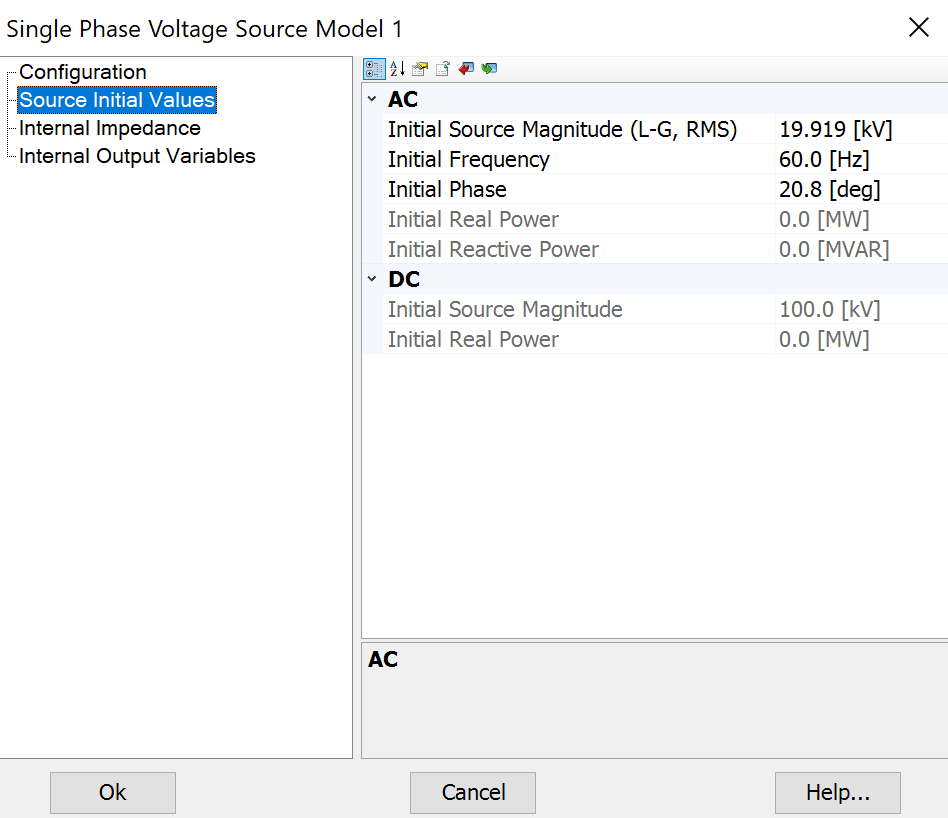

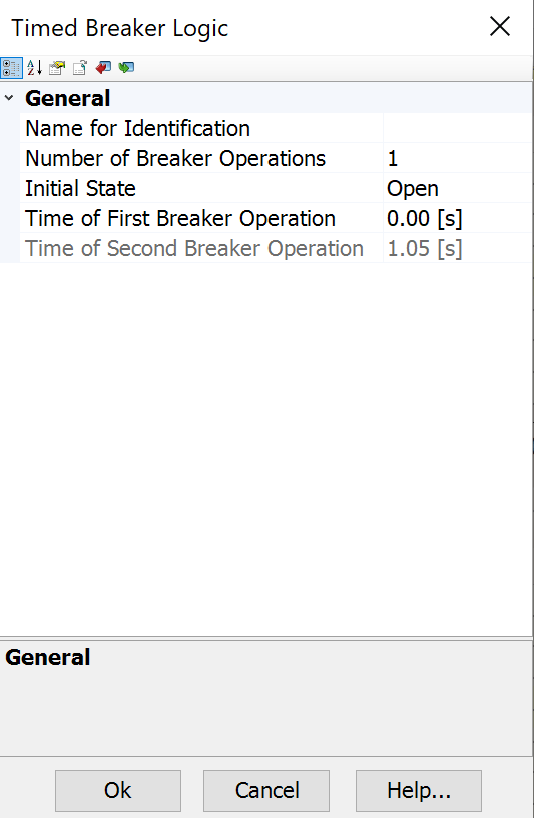

Figure 11. Example One Voltage Source and Circuit Breaker Timing Settings


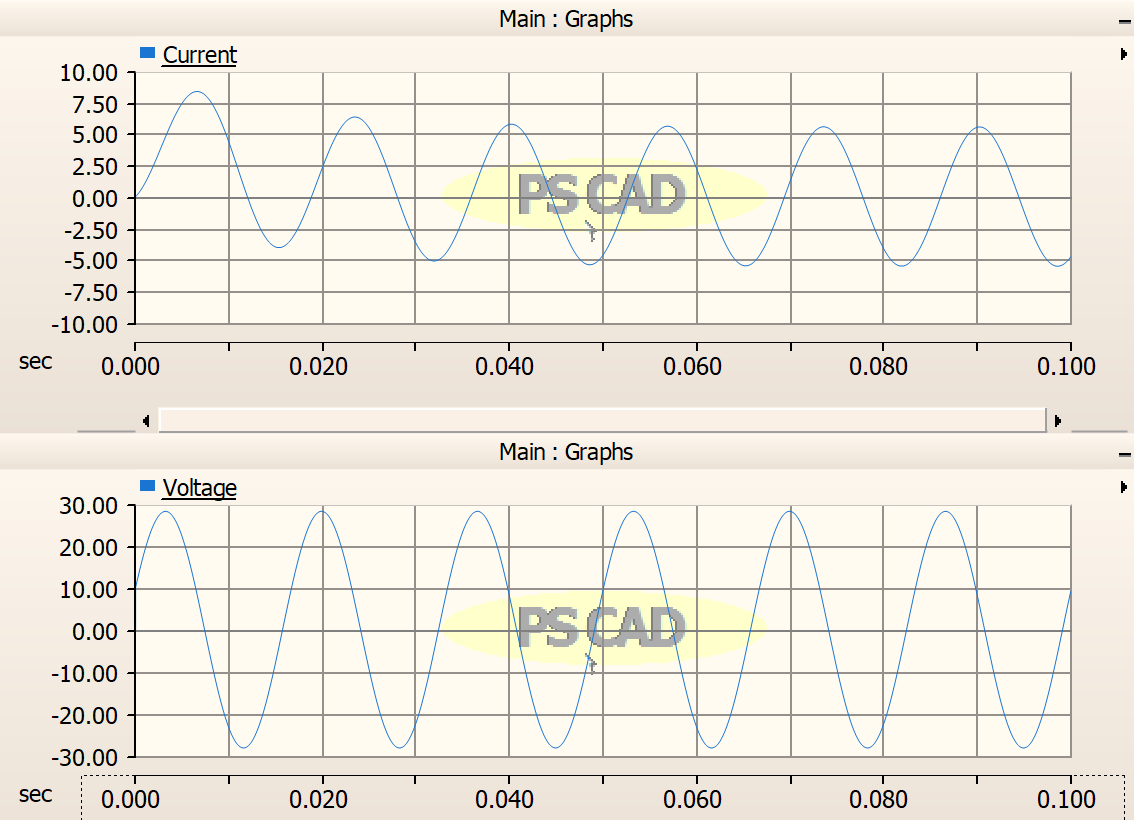

Figure 12. Example One Simulation Results


## Example Two Benchmark

The circuit constructed in PSCAD to replicate Example Two is shown in Fig. 10 below. This circuit is similar to Example One, but now a load resistor has been added.
The voltage source defaults to a sine wave, and the phase shift corresponding to point of wave angle theta is set to zero as shown in Fig. 11.
The circuit breaker logic shown in Fig. 11 indicates that the breaker will be closed at 0.05 seconds and start to clear at 0.15 seconds as shown in Fig. 11. However as can be seen in the breaker setup window, the breaker cannot just open at any current. The breaker will not fully clear the fault in the simulation until a current zero. The setup window does give us the option to model a current chop if needed.

When the program is executed, the current and voltage plots are generated as given in Fig. 12. Before the fault occurs, we see that we have an initial load current with 685 A peak, which is close to the 687 A peak from the Python code.
When the fault occurs after 3 cycles, we see a peak of 8506 A (right click on plot, copy data into clipboard and paste csv into spreadsheet) with a steady-state value of 5525 A. These values are close to the 8516 and 5524 calculated in the Python code.

A closeup up for the fault current at the transition between fault and postfault is shown in Fig. 13. We can see that the current zero occurs at t=0.1536, which is 0.1036 seconds after the fault occurs at 0.05 seconds. This matches up with the zero crossing time computed in the Python simulation.



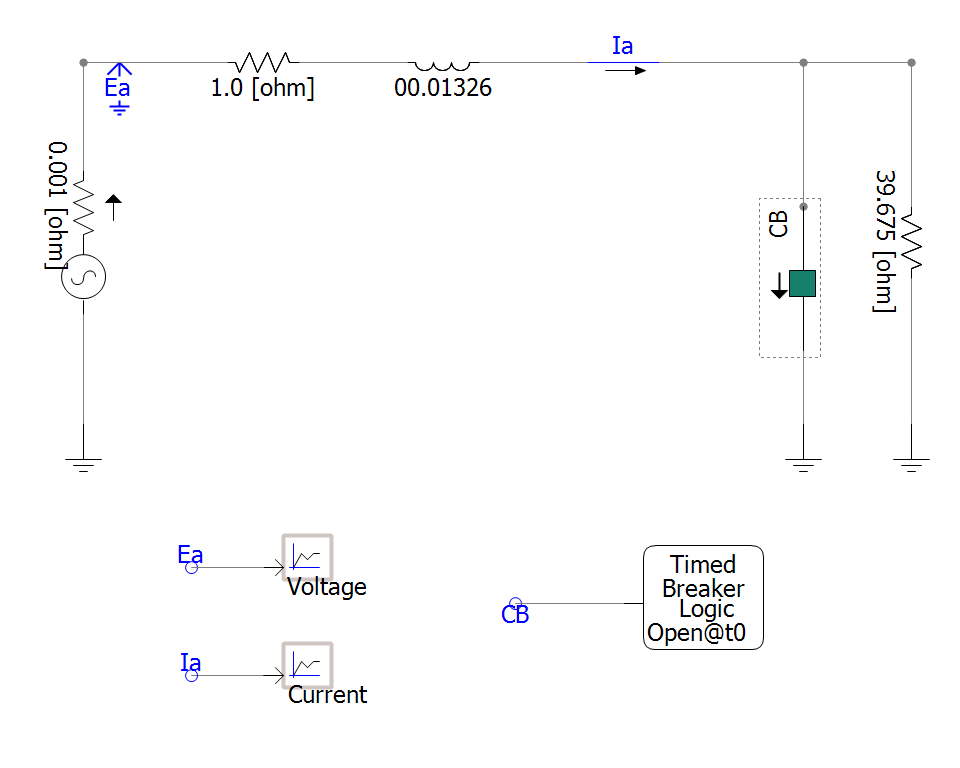

Figure 13. Example Two RL Circuit with Load



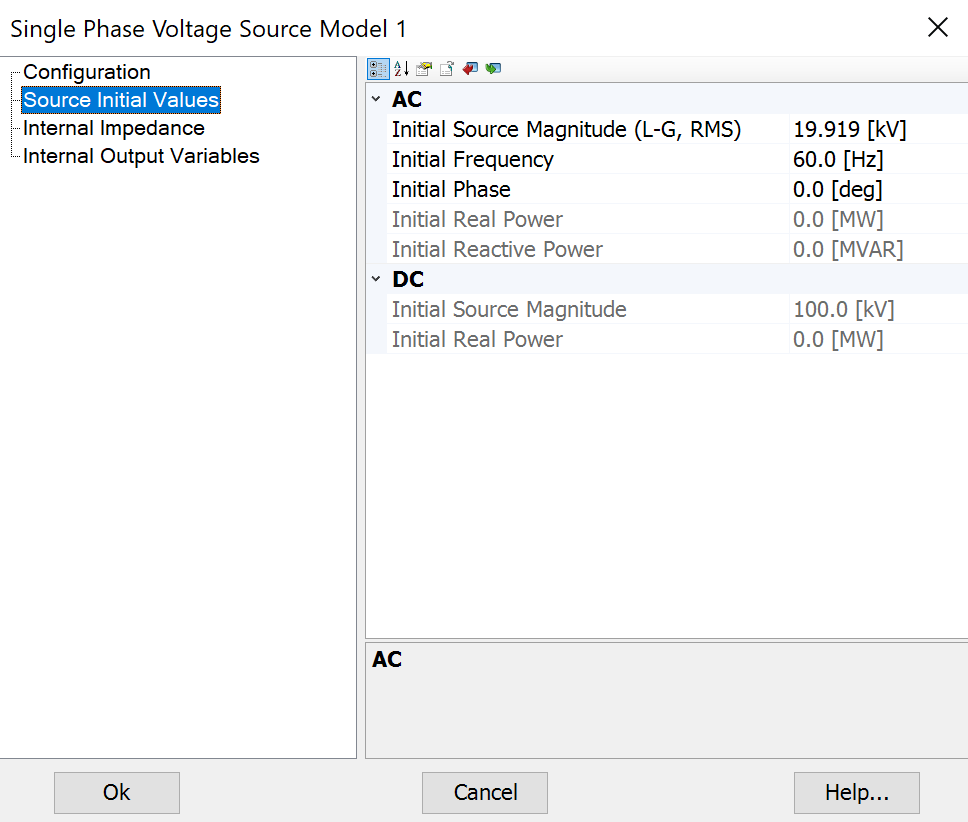

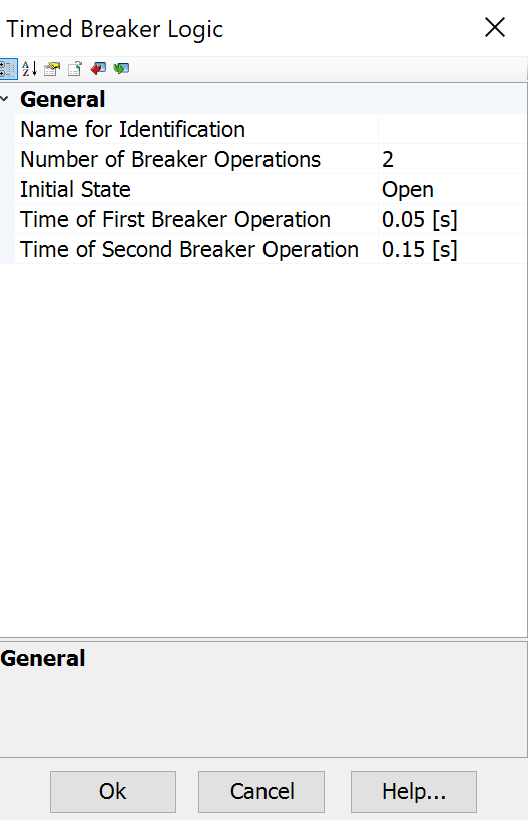

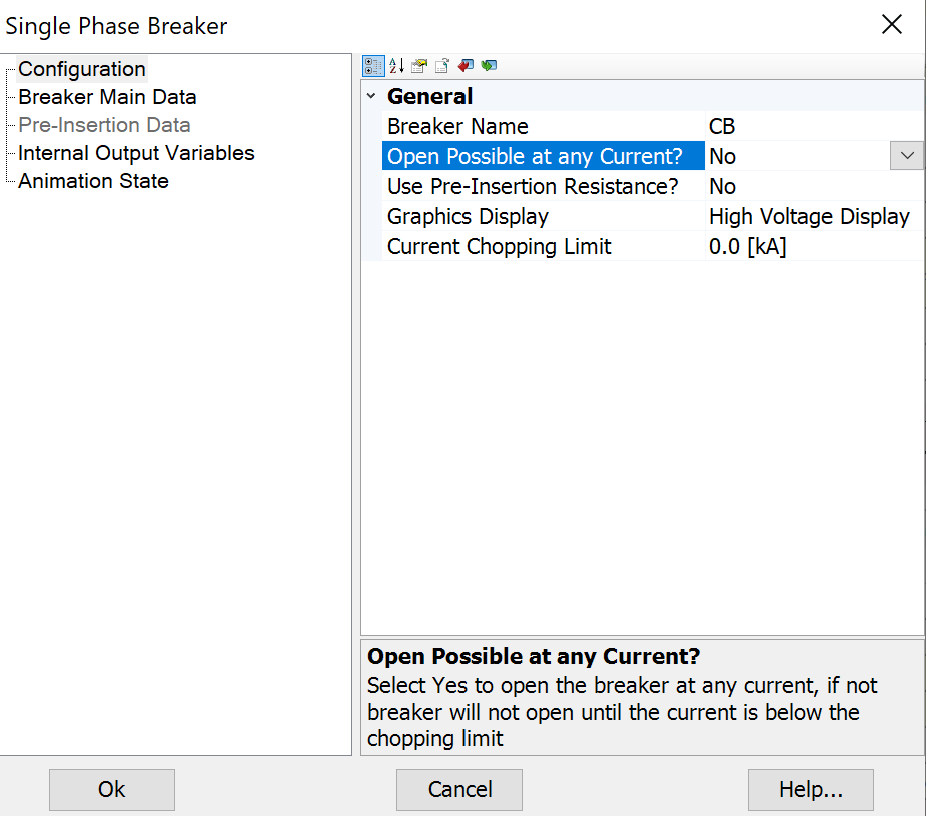

Figure 14. Example Two Voltage Source and Circuit Breaker Settings



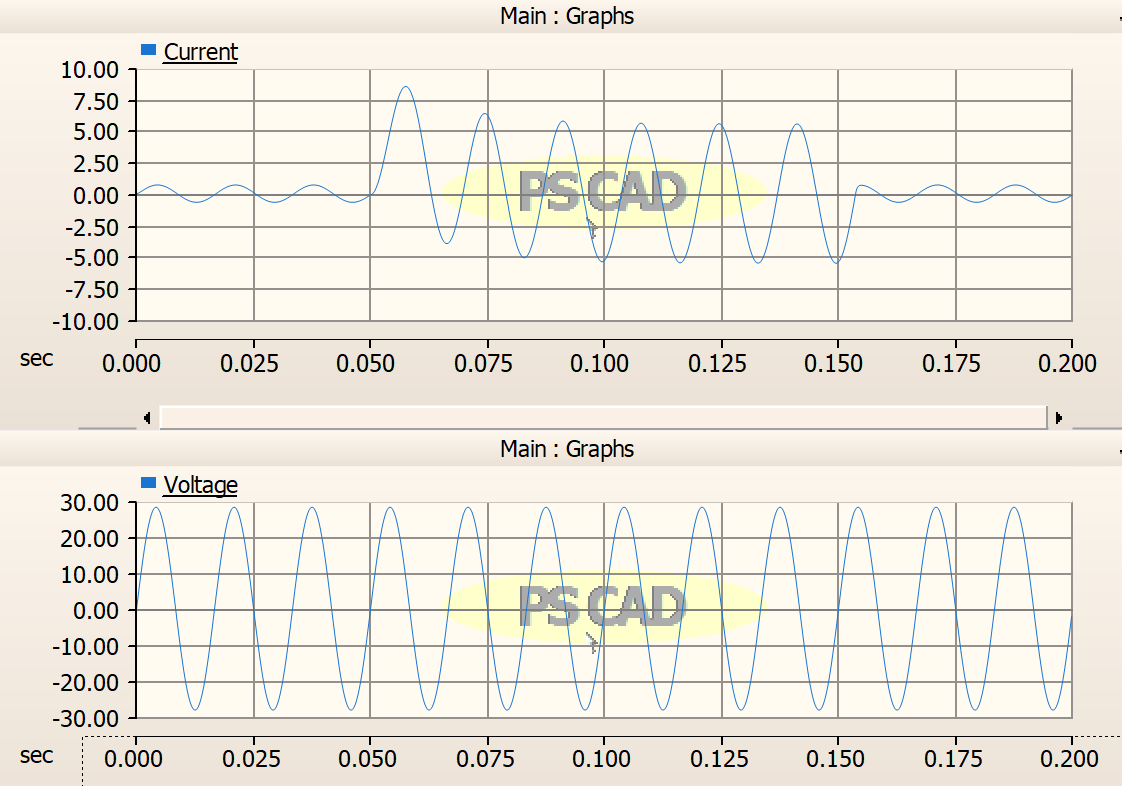

Figure 15. Example Two Simulation Results



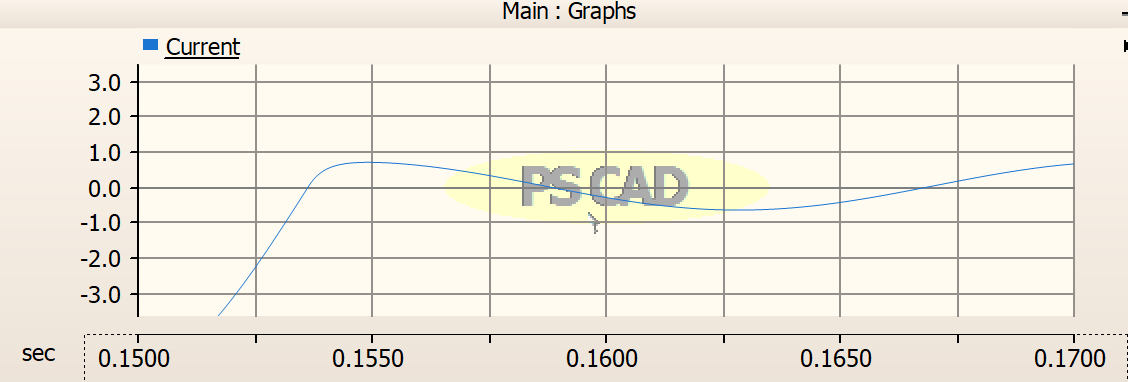

Figure 16. Example Two Fault Clearing at Zero Crossing

## Summary - Fault Current Transient

For a single-phase fault on an RL circuit with no load, given a voltage source given by:

$$ {v_s}\left( t \right) = \sqrt 2 {V_M}\sin \left( {\omega t + \theta } \right) \tag{36}$$

the fault current starting at t=0 will have the form:

$$
i\left( t \right) = \frac{{\sqrt 2 {V_M}}}{{\sqrt {{R^2} + {{\left( {\omega L} \right)}^2}} }}\left( {\sin \left( {\omega t + \theta  - {{\tan }^{ - 1}}\left( {\frac{{\omega L}}{R}} \right)} \right) - \sin \left( {\theta  - {{\tan }^{ - 1}}\left( {\frac{{\omega L}}{R}} \right)} \right){e^{ - \frac{R}{L}t}}} \right)
\tag{37}
$$


## Summary - Fault Current Transient (Continued)
      
This single-phase fault current current is characterized by:

- A sinusoidal component corresponding to the steady-state component of the current, also referred to as the symmetrical current.
- An additional DC component that decays exponentially, and when added to the symmetrical current, gives us the net asymmetrical current.
- This DC component puts additional stress on the circuit breaker during the first cycle of the fault, which must be accounted for in the peak current rating.
- This additional amount of stress, often characterized by the ratio of Ipeak/Isymmtrical, will be dependent on the X/R ratio of the circuit.
- For circuit with an X/R ratio of 10, this factor will be 1.74 and for a circuit with an X/R ratio of 3, this factor will be 1.38. And so transmission circuits (high X/R ratios) will see more DC offset in fault current waveforms, than distribution circuits (lower X/R ratios). The maximum factor is 2 as X/R goes to infinity.

© 2023 Dr. David Lubkeman